# Simulation Numérique et Analyse

In [6]:
%load_ext autoreload
%autoreload 2

## Équation de la Chaleur en 1D

Nous visons à résoudre l'Équation de la Chaleur en 1D avec des conditions de Dirichlet : $u_l=u_d=0$ et la condition initiale :
$$u_0(x)=\sin(\pi L x), \quad x\in [0,1] \tag{1}$$

Cette simulation démontre comment la chaleur se diffuse à travers un matériau au fil du temps, conformément à la seconde loi de la thermodynamique.

Les résultats montrent que sans source de chaleur, la température diminue progressivement jusqu'à atteindre l'équilibre avec les conditions aux limites, illustrant parfaitement le flux thermique des régions chaudes vers les régions froides.

In [22]:
from heat_equation_solvers import *

### Méthode explicite

En résolvant l'équation de la chaleur en une dimension avec des conditions de dirichlet $T_g=T_d=0$ on obtient le schéma explicite suivant :

$$
\begin{pmatrix}
T_1 \\
T_2 \\
\vdots \\
T_{N-1}
\end{pmatrix}^{n+1}
=
\begin{pmatrix}
1 - 2\alpha & \alpha & 0 & \cdots & 0 \\
\alpha & 1 - 2\alpha & \alpha & \cdots & 0 \\
0 & \alpha & \ddots & \ddots & \vdots \\
\vdots & \vdots & \ddots & 1 - 2\alpha & \alpha \\
0 & 0 & \cdots & \alpha & 1 - 2\alpha
\end{pmatrix}
\begin{pmatrix}
T_1 \\
T_2 \\
\vdots \\
T_{N-1}
\end{pmatrix}^{n}
+ \alpha
\begin{pmatrix}
T_g \\
0 \\
\vdots \\
0 \\
T_d
\end{pmatrix}
$$

La class `ExplicitHeatEquationSolver1D` est une implémentation de cette méthode de résolution.


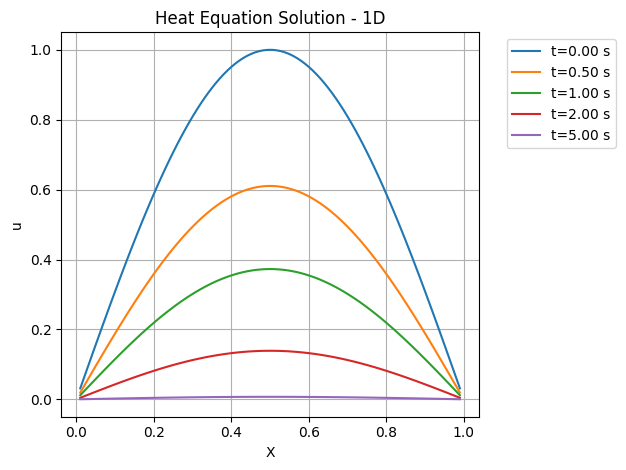

<Axes: title={'center': 'Heat Equation Solution - 1D'}, xlabel='X', ylabel='u'>

In [2]:
explicit_solver = ExplicitHeatEquationSolver1D(100,0.0001,5)
explicit_solver.get_solution_plot([0,0.5,1,2,5])

Nous observons que la température diminue au cours du temps dans la simulation, ce qui est un comportement attendu pour l'équation de la chaleur avec nos conditions initiales et les conditions de Dirichlet de $0K$ des deux côtés.

L'équation de la chaleur modélise comment la chaleur se diffuse dans un matériau au fil du temps. Avec des conditions aux limites nulles ou froides, la chaleur s'écoule naturellement des régions plus chaudes vers les régions plus froides jusqu'à ce que l'équilibre soit atteint. Par conséquent, avec le temps, la chaleur se diffuse vers les limites et se dissipe.

Ceci est physiquement exact - sans source de chaleur, un système se refroidit progressivement pour correspondre à ses conditions aux limites, suivant la deuxième loi de la thermodynamique où la chaleur s'écoule des régions chaudes vers les régions froides.

Voici une simulation avec $L \neq 1$, ce qui est très improbable d'un point de vue physique. Nous avons réalisé cette simulation pour respecter la condition initiale et son paramètre L.

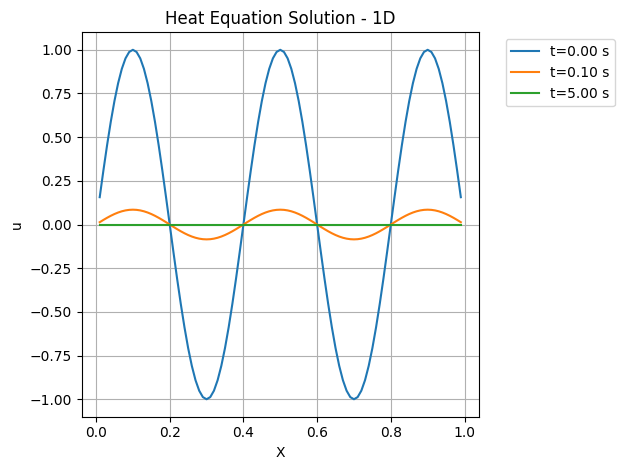

<Axes: title={'center': 'Heat Equation Solution - 1D'}, xlabel='X', ylabel='u'>

In [3]:
explicit_solver = ExplicitHeatEquationSolver1D(100,0.0001,5, L=5)
explicit_solver.get_solution_plot([0,0.1,5])

### Méthode Implicite

En résolvant l'équation de la chaleur en une dimension avec des conditions de dirichlet $T_g=T_d=0$ on obtient le schéma implicite suivant :

$$
\begin{pmatrix}
1 + 2\alpha & -\alpha & 0 & \cdots & 0 \\
-\alpha & 1 + 2\alpha & -\alpha & \cdots & 0 \\
0 & -\alpha & \ddots & \ddots & \vdots \\
\vdots & \vdots & \ddots & 1 + 2\alpha & -\alpha \\
0 & 0 & \cdots & -\alpha & 1 + 2\alpha
\end{pmatrix}
\begin{pmatrix}
T_1 \\
T_2 \\
\vdots \\
T_{N-1}
\end{pmatrix}^{n+1}
=
\begin{pmatrix}
T_1 \\
T_2 \\
\vdots \\
T_{N-1}
\end{pmatrix}^{n}
+ \alpha
\begin{pmatrix}
T_g \\
0 \\
\vdots \\
0 \\
T_d
\end{pmatrix}
$$


La class `ImplicitHeatEquationSolver1D` est une implémentation de cette méthode de résolution.


c:\Users\romai\OneDrive - De Vinci\Bureau\Esilv\Maths\A3 S2\EDP\heat_equation_solvers\implicit_heat_equation_solver1d.py:76: SparseEfficiencyWarning: spilu converted its input to CSC format
  self.lu = spilu(self.M)


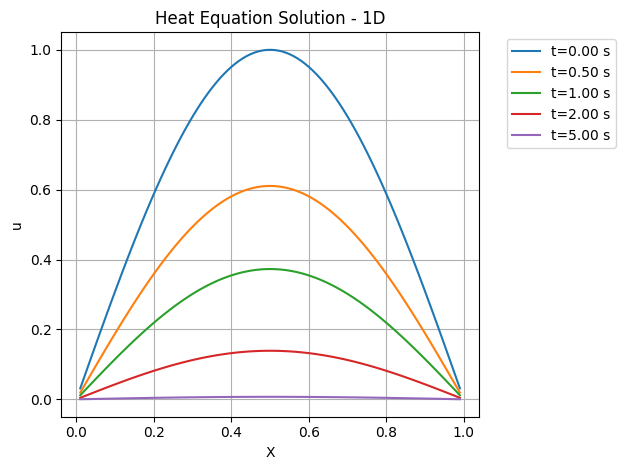

<Axes: title={'center': 'Heat Equation Solution - 1D'}, xlabel='X', ylabel='u'>

In [4]:
implicit_solver = ImplicitHeatEquationSolver1D(100,0.0001,5)
implicit_solver.get_solution_plot([0,0.5,1,2,5])

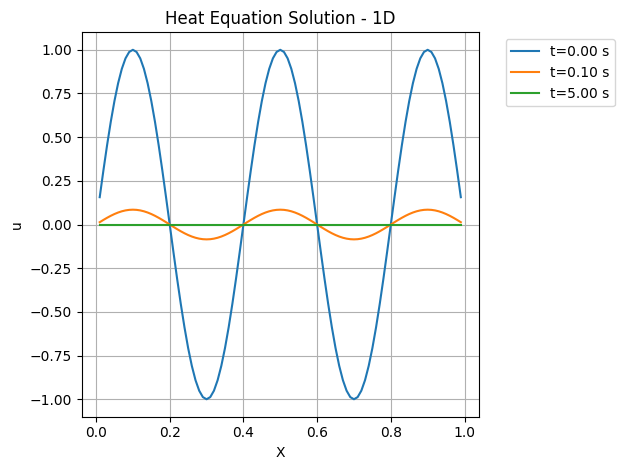

<Axes: title={'center': 'Heat Equation Solution - 1D'}, xlabel='X', ylabel='u'>

In [5]:
explicit_solver = ExplicitHeatEquationSolver1D(100,0.0001,5, L=5)
explicit_solver.get_solution_plot([0,0.1,5])

### Comparaison des résultats

Exprimons la solution explicite de notre équation de la chaleur:

$$u_{xt}(x)=e^{-at}\sin(\pi x)\space | \space a=v\pi^2, v=0.1 \tag{2}$$

on a :
- $\frac{\partial u_{xt}}{\partial t} = -a e^{-at} \sin(\pi x) = -v\pi^2 e^{-at} \sin(\pi x)$
- $\frac{\partial^2 u_{xt}}{\partial x^2} = -\pi^2 e^{-at} \sin(\pi x)$

or :

$\frac{\partial u_{xt}}{\partial t} - v \frac{\partial^2 u_{xt}}{\partial x^2} = -v\pi^2 e^{-at} \sin(\pi x)+ v\pi^2 e^{-at} \sin(\pi x) = 0$

Donc $u_{xt}(x)$ est bien solution de l'eqution de la chaleur en une dimension.






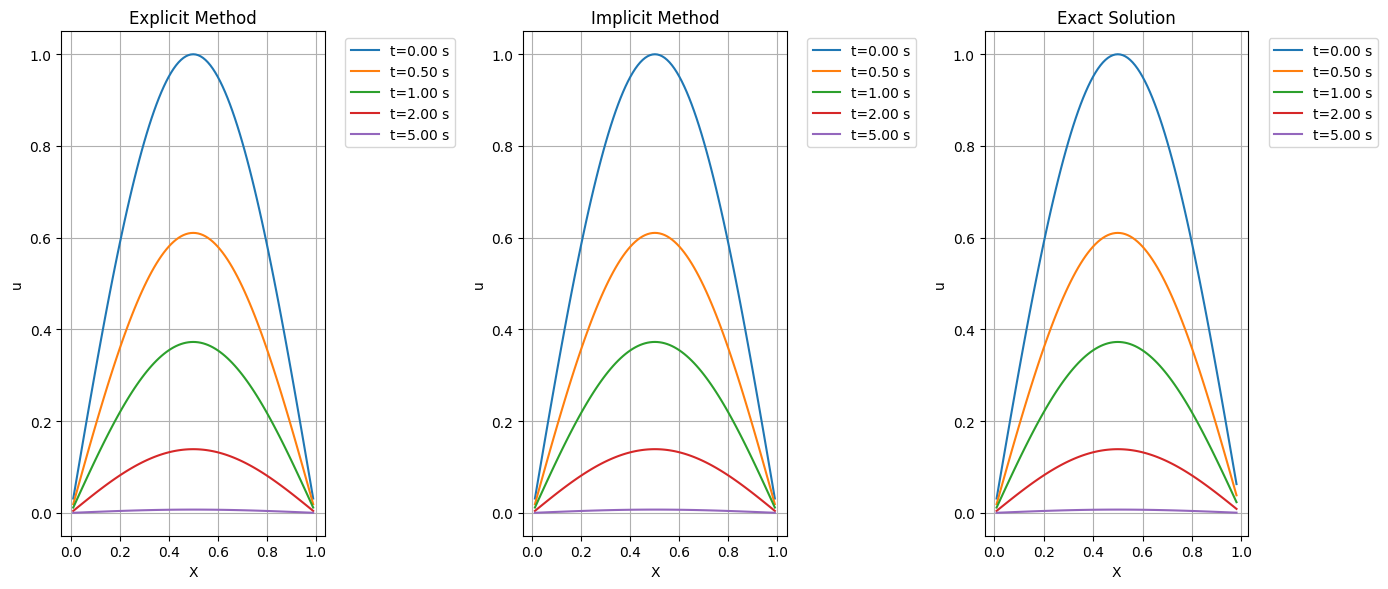

In [24]:
import matplotlib.pyplot as plt
import math

# Create a figure with two subplots side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))
times = [0,0.5,1,2,5]
v = 0.1
# Both subplots will be used in the display_solution methods below
explicit_solver = ExplicitHeatEquationSolver1D(100,0.0001,5,v=0.1)
explicit_solver.get_solution_plot(times,ax=ax1,show_plot=False)
implicit_solver = ImplicitHeatEquationSolver1D(100,0.0001,5,v=0.1)
implicit_solver.get_solution_plot(times,ax=ax2,show_plot=False)
t=0
for t in times:
    time_to_plot = implicit_solver.get_time_index(t)
    ax3.plot(implicit_solver.X[1:implicit_solver.N-1],[math.exp(-math.pi**2*v*t)*math.sin(math.pi*x) for x in implicit_solver.X[1:implicit_solver.N-1]],label=f"t={implicit_solver.T[time_to_plot]:.2f} s")

ax1.set_title('Explicit Method')
ax2.set_title('Implicit Method')
ax3.set_title('Exact Solution')

ax3.set_xlabel('X')
ax3.set_ylabel('u')
ax3.grid()
ax3.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

Nous observons que les résultats obtenus par les méthodes implicite et explicite sont identiques et sont similaires (égaux aux approximation prêtes) à la solution exacte de l'EDP de la chaleur.